In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the JSON file
with open('/Users/megz/Desktop/uni/MA - DTA/S2/Natural Language Processing/Shared task/amiv_nlp_2025/data/filtered_pandora_all_labeled.json', "r", encoding="utf-8") as f:
    data = json.load(f)

# Build rows per author
rows = []
for author in data["authors"]:
    row = {
        "author_id": author["id"],
        "comments": author["comments"],
        **author["labels"]  # unpack the personality trait scores
    }
    rows.append(row)

# Convert to DataFrame
df = pd.DataFrame(rows)
df["comments"] = df["comments"].apply(lambda x: " ".join(x))
df.head()

,author_id,comments,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional stability
0,-Areopagan-,Yeah I wouldnt want to deal with someone like ...,high,high,medium,low,high
1,-BigSexy-,I'm not sure if it constitutes an official pol...,high,low,low,medium,high
2,-BlitzN9ne,You're doing god's work Man this is some quali...,high,low,medium,medium,high
3,-CrestiaBell,Quick update: I got outbid on (potentially) an...,high,medium,high,medium,medium
4,-dyad-,"Ok, this is adorable. And he's completely cor...",high,medium,low,medium,medium



🔹 Word Length Stats:
count      32.000000
mean      509.937500
std       170.608009
min       330.000000
25%       428.500000
50%       469.000000
75%       558.000000
max      1232.000000
Name: comment_length_words, dtype: float64

🔹 Character Length Stats:
count      32.000000
mean     2777.156250
std       901.779356
min      1760.000000
25%      2355.750000
50%      2627.500000
75%      2976.250000
max      6592.000000
Name: comment_length_char, dtype: float64


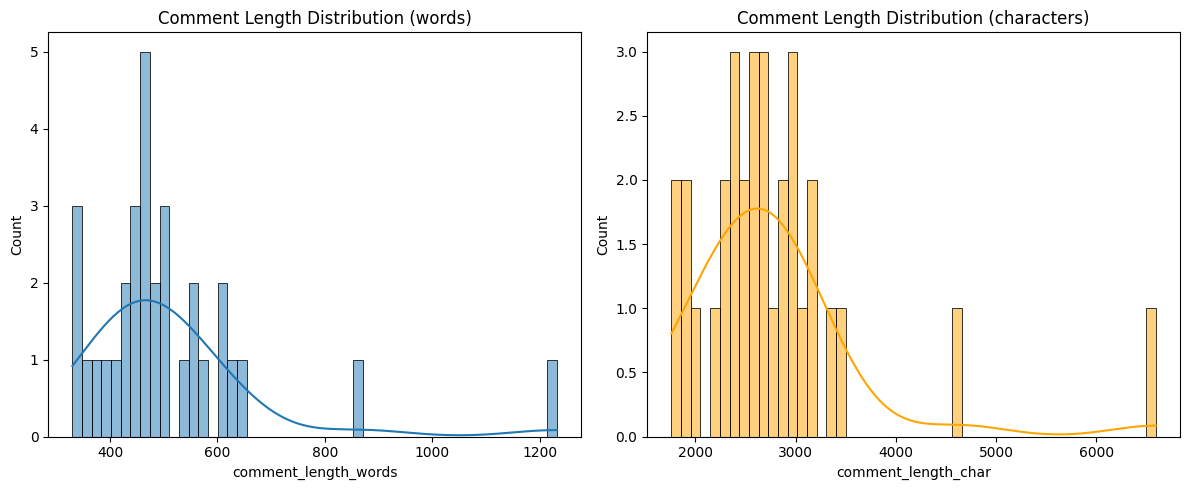


🔹 Class Distributions:

Openness class counts:
Openness
high      20
low        8
medium     4
Name: count, dtype: int64

Conscientiousness class counts:
Conscientiousness
low       20
high       6
medium     6
Name: count, dtype: int64

Extraversion class counts:
Extraversion
low       13
high      10
medium     9
Name: count, dtype: int64

Agreeableness class counts:
Agreeableness
high      24
low        5
medium     3
Name: count, dtype: int64

Emotional stability class counts:
Emotional stability
medium    15
low       13
high       4
Name: count, dtype: int64


In [ ]:
trait_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Emotional stability"]
text_col = "comments"  

# Comment length stats 
df["comment_length_words"] = df[text_col].apply(lambda x: len(str(x).split())) #split on whitespaces
df["comment_length_char"] = df[text_col].apply(lambda x: len(str(x))) #length of strings

print("\n🔹 Word Length Stats:")
print(df["comment_length_words"].describe())
print("\n🔹 Character Length Stats:")
print(df["comment_length_char"].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["comment_length_words"], bins=50, kde=True)
plt.title("Comment Length Distribution (words)")

plt.subplot(1, 2, 2)
sns.histplot(df["comment_length_char"], bins=50, kde=True, color="orange")
plt.title("Comment Length Distribution (characters)")
plt.tight_layout()
plt.show()

# Class distribution per trait

for trait in trait_cols:
    if df[trait].dtype in ['float64', 'int64']:
        df[trait + "_cat"] = df[trait].apply(convert)

print("\n🔹 Class Distributions:")
for trait in trait_cols:
    if trait in df.columns:
        print(f"\n{trait} class counts:")
        print(df[trait].value_counts())


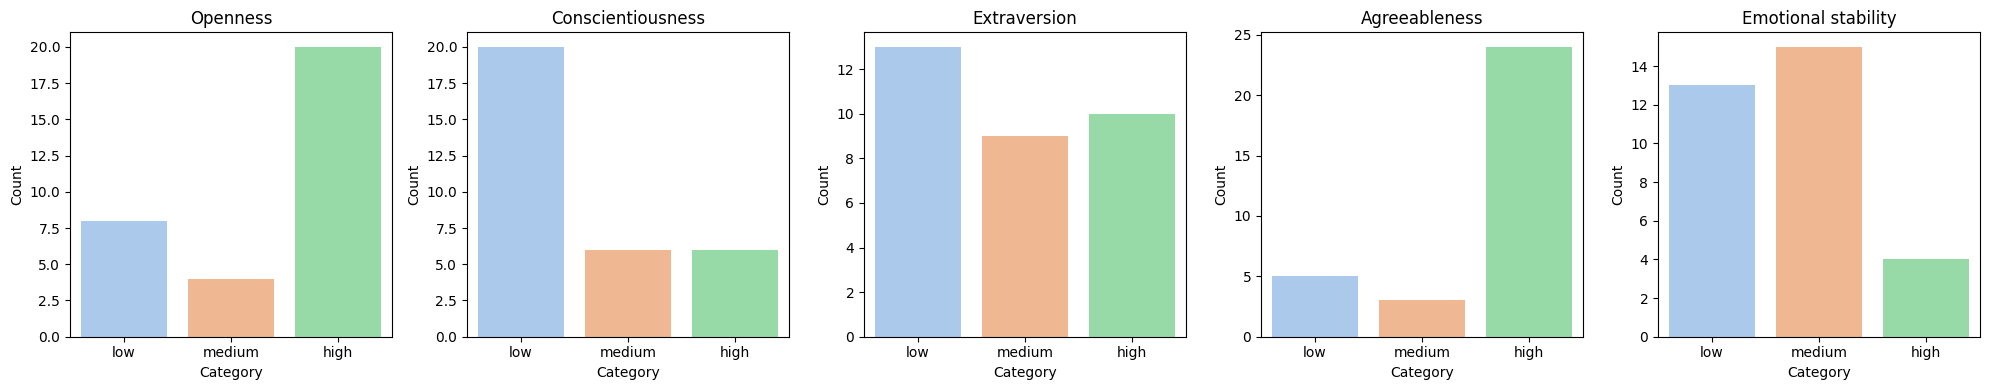

In [ ]:
trait_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Emotional stability"]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # width 20, height 4

# Generate count plots for each trait
for i, trait in enumerate(trait_cols):
    if trait in df.columns:
        sns.countplot(x=trait, data=df, palette="pastel", ax=axes[i],hue = trait, order=['low', 'medium', 'high'], hue_order=['low', 'medium', 'high'], legend=False)
        axes[i].set_title(f"{trait}")
        axes[i].set_xlabel("Category")
        axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


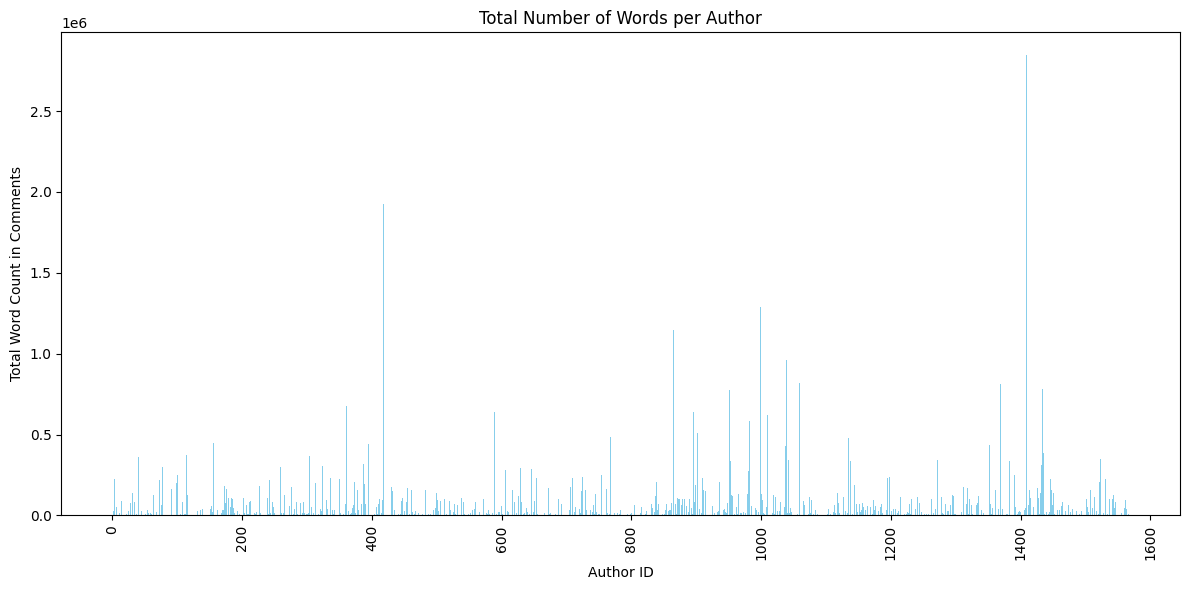

In [ ]:
# Sort by word count
df_sorted = df.sort_values("comment_length_words", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_sorted.index, df_sorted['comment_length_words'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Author ID")
plt.ylabel("Total Word Count in Comments")
plt.title("Total Number of Words per Author")
plt.tight_layout()
plt.show()


In [21]:
val = pd.read_csv('/Users/megz/Desktop/uni/MA - DTA/S2/Natural Language Processing/Shared task/amiv_nlp_2025/data/val_data.csv')
val["comments"] = val[["Q1", "Q2", "Q3"]].apply(lambda x: ' '.join(x.astype(str)), axis=1)
val.head()

,id,Q1,Q2,Q3,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional stability,Humility,comments
0,1,When I was the chairman of a student organisat...,I learned one of the most important lessons in...,Because I was a board member of a student orga...,high,low,high,high,low,low,When I was the chairman of a student organisat...
1,2,I am leader and group-leader in scouts. This m...,"When I failed my first exam, I felt like givin...",For this I would go back to scouts. Last year ...,high,low,high,high,medium,high,I am leader and group-leader in scouts. This m...
2,3,I was given a project to lead a commercial exe...,In a retail company i was given a task to rede...,I was asked to lead a team as interim manager....,high,high,high,high,medium,high,I was given a project to lead a commercial exe...
3,4,I have been presented with many situations tha...,I have recently started volunteering at a cult...,Perhaps the most challenging leadership role I...,low,low,medium,high,medium,high,I have been presented with many situations tha...
4,5,For a long time I did not like presenting pape...,When I send in an article that I had written f...,My grandparents like to spend time with their ...,medium,low,low,high,low,high,For a long time I did not like presenting pape...



🔹 Word Length Stats:
count      32.000000
mean      509.937500
std       170.608009
min       330.000000
25%       428.500000
50%       469.000000
75%       558.000000
max      1232.000000
Name: comment_length_words, dtype: float64

🔹 Character Length Stats:
count      32.000000
mean     2777.156250
std       901.779356
min      1760.000000
25%      2355.750000
50%      2627.500000
75%      2976.250000
max      6592.000000
Name: comment_length_char, dtype: float64


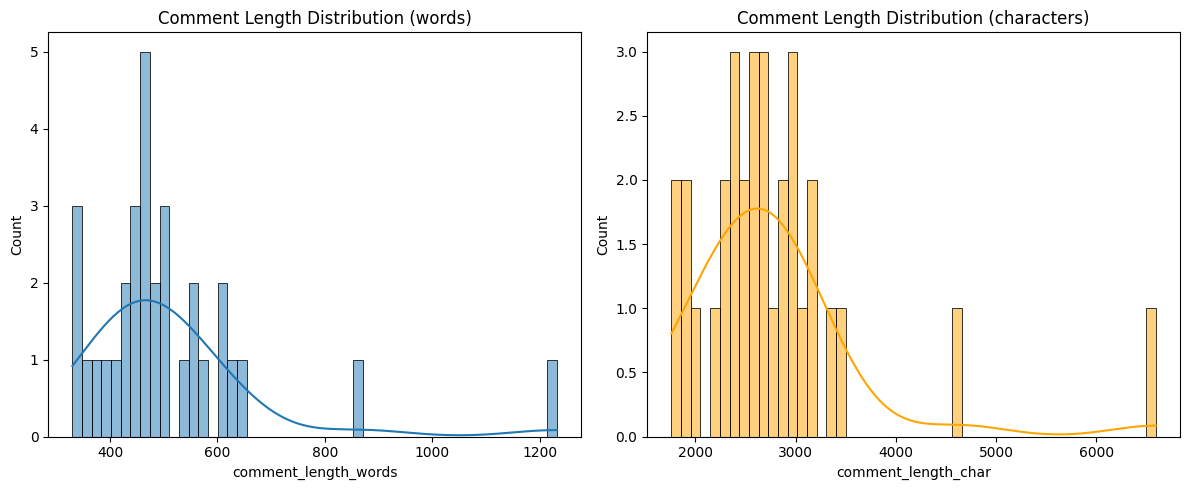


🔹 Class Distributions:

Openness class counts:
Openness
high      20
low        8
medium     4
Name: count, dtype: int64

Conscientiousness class counts:
Conscientiousness
low       20
high       6
medium     6
Name: count, dtype: int64

Extraversion class counts:
Extraversion
low       13
high      10
medium     9
Name: count, dtype: int64

Agreeableness class counts:
Agreeableness
high      24
low        5
medium     3
Name: count, dtype: int64

Emotional stability class counts:
Emotional stability
medium    15
low       13
high       4
Name: count, dtype: int64


In [36]:
df = val
trait_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Emotional stability"]
text_col = "comments"  

# Comment length stats 
df["comment_length_words"] = df[text_col].apply(lambda x: len(str(x).split())) #split on whitespaces
df["comment_length_char"] = df[text_col].apply(lambda x: len(str(x))) #length of strings

print("\n🔹 Word Length Stats:")
print(df["comment_length_words"].describe())
print("\n🔹 Character Length Stats:")
print(df["comment_length_char"].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["comment_length_words"], bins=50, kde=True)
plt.title("Comment Length Distribution (words)")

plt.subplot(1, 2, 2)
sns.histplot(df["comment_length_char"], bins=50, kde=True, color="orange")
plt.title("Comment Length Distribution (characters)")
plt.tight_layout()
plt.show()

# Class distribution per trait

print("\n🔹 Class Distributions:")
for trait in trait_cols:
    if trait in df.columns:
        print(f"\n{trait} class counts:")
        print(df[trait].value_counts())
    


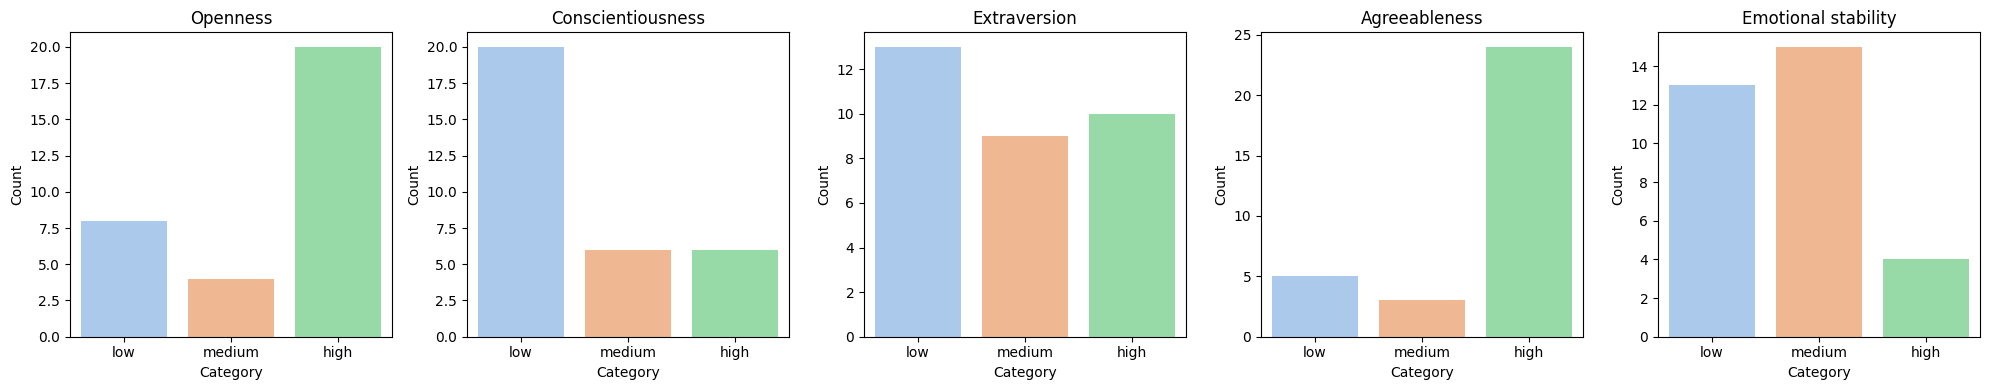

In [35]:
trait_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Emotional stability"]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # width 20, height 4

# Generate count plots for each trait
for i, trait in enumerate(trait_cols):
    if trait in df.columns:
        sns.countplot(x=trait, data=df, palette="pastel", ax=axes[i],hue = trait, order=['low', 'medium', 'high'], hue_order=['low', 'medium', 'high'], legend=False)
        axes[i].set_title(f"{trait}")
        axes[i].set_xlabel("Category")
        axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


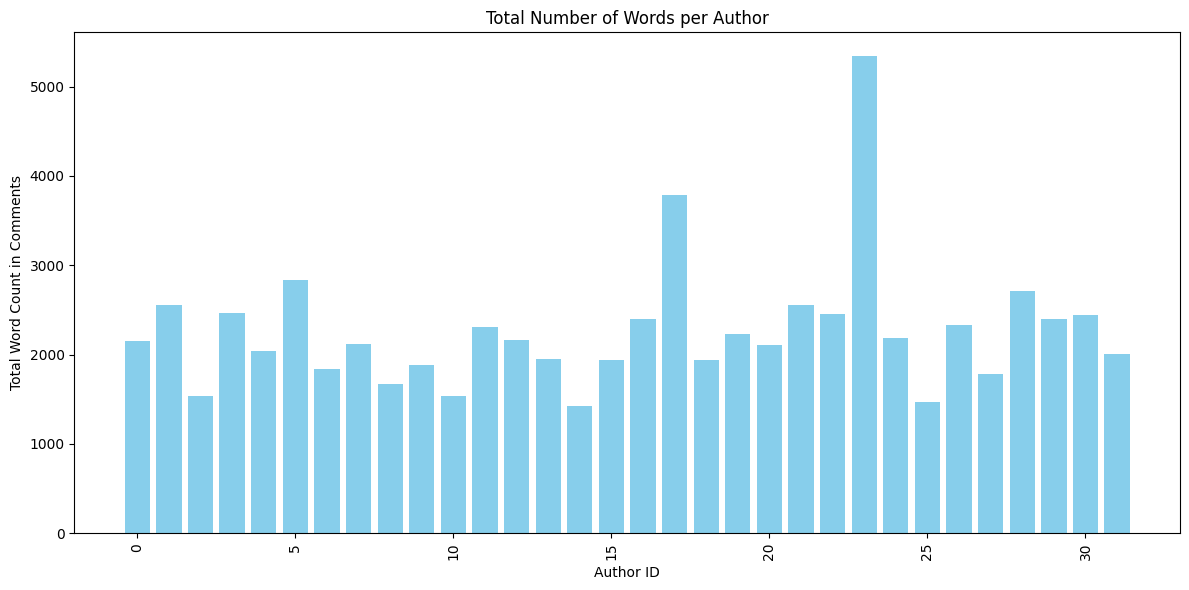

In [24]:

# total word count per author
df["total_word_count"] = df["comments"].apply(
    lambda comments: sum(len(c.split()) for c in comments)
)
df_sorted = df.sort_values("total_word_count", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_sorted.index, df_sorted["total_word_count"], color='skyblue') #df_sorted["author_id"]
plt.xticks(rotation=90)
plt.xlabel("Author ID")
plt.ylabel("Total Word Count in Comments")
plt.title("Total Number of Words per Author")
plt.tight_layout()
plt.show()
